# Part 2 – Simple Text Processing and Vectorization

Project: STAT 159 Project 2 – NLP  
Notebook author: Zhanna Chvyl and Quiroz Stephanie
Group: 26


## 2.1 Setup and Imports


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Make plots appear inside the notebook
%matplotlib inline

# 1. Load the data
df = pd.read_csv("data/SOTU.csv")

# Clean column names (make them lowercase, remove spaces)
df.columns = df.columns.str.strip().str.lower()
print("Columns:", df.columns.tolist())

df.head()


Columns: ['president', 'year', 'text', 'word count']


,president,year,text,word count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


## 2.2 Load Data 


In [3]:
# Keep only speeches from year 2000 and later
df_modern = df[df["year"] >= 2000].copy()

print(f"Total speeches in full dataset: {len(df)}")
print(f"Speeches from 2000 and later: {len(df_modern)}")

df_modern[["year", "president"]].head()


Total speeches in full dataset: 246
Speeches from 2000 and later: 25


,year,president
0,2024.0,Joseph R. Biden
1,2023.0,Joseph R. Biden
2,2022.0,Joseph R. Biden
3,2021.0,Joseph R. Biden
4,2020.0,Donald J. Trump


## 2.3 spaCy Text Pipeline (Tokenization & Lemmatization)


In this section, I use spaCy to process the State of the Union speeches.

- **Token**: a single word-like unit from the text (for example, "running", "people").
- **Lemma**: the base form of a word (for example, "running" → "run", "better" → "good").
- **Stop word**: a very common word that usually does not add much meaning, like "the", "and", "of".
- **Punctuation**: symbols like ".", ",", "!", "?", etc.

For this analysis, I remove stop words and punctuation, and I work mostly with **lemmas**.  
Using lemmas helps to group different forms of the same word together (for example, "runs", "running", "ran" all become "run"), which makes the frequency counts and models less noisy.


In [6]:
from collections import Counter
import itertools
import pandas as pd   # just in case
def get_filtered_tokens(text, nlp_model):
    """
    Return a list of cleaned tokens from a text:
    - Convert to string (in case of missing values)
    - Lowercase
    - Keep only alphabetic tokens
    - Remove stop words
    - Remove punctuation
    """
    if pd.isna(text) or text is None:
        return []

    doc = nlp_model(str(text))

    tokens = [
        token.text.lower()
        for token in doc
        if token.is_alpha          # only words (no numbers/symbols)
        and not token.is_stop      # remove stop words
        and not token.is_punct     # remove punctuation
    ]
    return tokens
def get_filtered_lemmas(text, nlp_model):
    """
    Return a list of cleaned lemmas (base forms) from a text:
    - Convert to string
    - Lowercase
    - Keep only alphabetic tokens
    - Remove stop words
    - Remove punctuation
    """
    if pd.isna(text) or text is None:
        return []

    doc = nlp_model(str(text))

    lemmas = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha
        and not token.is_stop
        and not token.is_punct
    ]
    return lemmas


In [7]:
# Take the first modern speech
sample_text = df_modern["text"].iloc[0]

print("Year:", df_modern["year"].iloc[0])
print("President:", df_modern["president"].iloc[0])
print("\nFirst 200 characters of speech:")
print(sample_text[:200])


Year: 2024.0
President: Joseph R. Biden

First 200 characters of speech:

[Before speaking, the President presented his prepared remarks to Speaker of the House of Representatives J. Michael Johnson.]
The President. Your bedtime reading.
Tony! Thank you. Looking for Jill.



In [8]:
sample_tokens = get_filtered_tokens(sample_text, nlp)
sample_lemmas = get_filtered_lemmas(sample_text, nlp)

print("First 25 cleaned tokens:")
print(sample_tokens[:25])

print("\nFirst 25 cleaned lemmas:")
print(sample_lemmas[:25])


First 25 cleaned tokens:
['speaking', 'president', 'presented', 'prepared', 'remarks', 'speaker', 'house', 'representatives', 'michael', 'johnson', 'president', 'bedtime', 'reading', 'tony', 'thank', 'looking', 'jill', 'good', 'evening', 'good', 'evening', 'smart', 'home', 'laughter', 'speaker']

First 25 cleaned lemmas:
['speak', 'president', 'present', 'prepared', 'remark', 'speaker', 'house', 'representatives', 'michael', 'johnson', 'president', 'bedtime', 'read', 'tony', 'thank', 'look', 'jill', 'good', 'evening', 'good', 'evening', 'smart', 'home', 'laughter', 'speaker']


## 2.4 Word Frequency Analysis

In [11]:
# Apply our functions to all speeches (year >= 2000)
token_lists = df["text"].apply(lambda x: get_filtered_tokens(x, nlp)).tolist()
lemma_lists = df["text"].apply(lambda x: get_filtered_lemmas(x, nlp)).tolist()

# Flatten lists
all_tokens = list(itertools.chain.from_iterable(token_lists))
all_lemmas = list(itertools.chain.from_iterable(lemma_lists))

token_counts = Counter(all_tokens)
lemma_counts = Counter(all_lemmas)

print("Top 20 tokens:")
print(token_counts.most_common(20))

print("\nTop 20 lemmas:")
print(lemma_counts.most_common(20))


Top 20 tokens:
[('government', 7462), ('states', 6837), ('congress', 5403), ('united', 5113), ('people', 4458), ('year', 4394), ('country', 3724), ('great', 3479), ('public', 3356), ('new', 3228), ('time', 3128), ('american', 3009), ('war', 2877), ('world', 2771), ('years', 2614), ('law', 2311), ('nation', 2300), ('national', 2291), ('state', 2253), ('present', 2222)]

Top 20 lemmas:
[('government', 8293), ('year', 7008), ('states', 6517), ('congress', 5408), ('united', 5050), ('country', 4790), ('people', 4651), ('great', 4447), ('nation', 3985), ('law', 3737), ('time', 3603), ('public', 3356), ('new', 3240), ('war', 3037), ('american', 3022), ('power', 2977), ('work', 2919), ('world', 2772), ('state', 2770), ('increase', 2759)]


Token vs Lemma Frequencies

From the top 20 **tokens** and **lemmas**, we see that many important words
are about government and the country: *government, states, congress, united,
people, country, nation, law, war, american*.

When I switch from tokens to **lemmas**, some words change their counts or
disappear. For example, "year" increases a lot and "years" disappears,
because spaCy groups both "year" and "years" into the lemma "year". This
reduces redundancy and makes the list of frequent words cleaner.

Using lemmas is helpful because different forms of the same word
("runs", "running", "ran") are treated as the same feature, which is better
for text analysis and later models like TF–IDF and topic modeling.

## 2.5 TF-IDF Vectorization

In [12]:
# Create a column with list of lemmas for each speech
df["lemmas_list"] = df["text"].apply(lambda x: get_filtered_lemmas(x, nlp))

# Turn list of lemmas into a single string per speech (space-separated)
df["lemmas_str"] = df["lemmas_list"].apply(lambda lemmas: " ".join(lemmas))

df[["year", "president", "lemmas_str"]].head()


,year,president,lemmas_str
0,2024.0,Joseph R. Biden,speak president present prepared remark speake...
1,2023.0,Joseph R. Biden,president speaker point president turn face au...
2,2022.0,Joseph R. Biden,president thank thank thank madam speaker mada...
3,2021.0,Joseph R. Biden,president thank thank thank good mitch chuck u...
4,2020.0,Donald J. Trump,president thank thank thank madam speaker vice...


In [14]:
import os
os.makedirs("outputs", exist_ok=True)


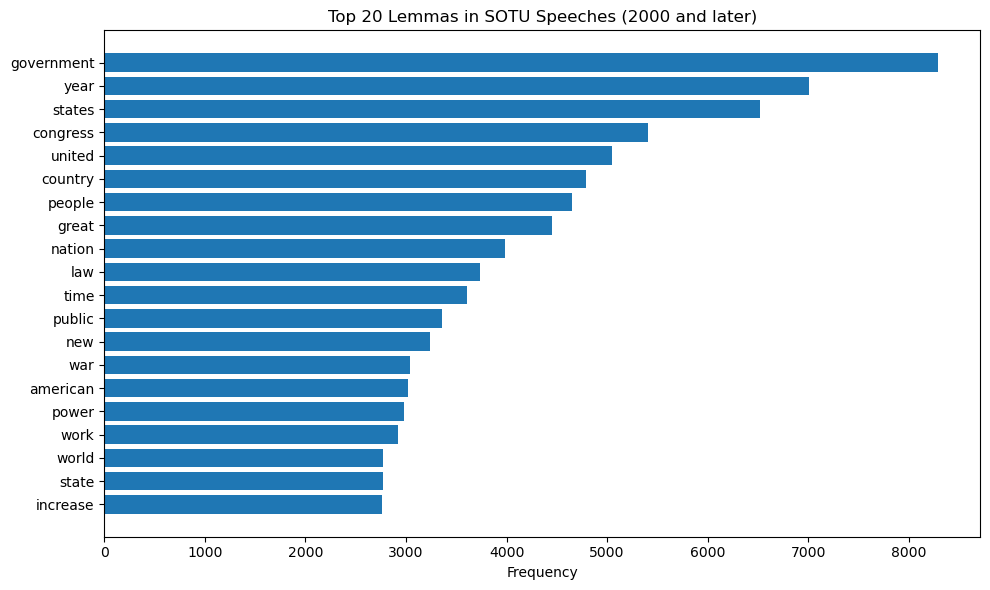

In [15]:
# Plot top 20 lemmas overall

top_20_lemmas = lemma_counts.most_common(20)
lemmas, counts = zip(*top_20_lemmas)

lemmas = list(lemmas)
counts = list(counts)

plt.figure(figsize=(10, 6))
plt.barh(lemmas, counts)
plt.gca().invert_yaxis()  # largest on top
plt.xlabel("Frequency")
plt.title("Top 20 Lemmas in SOTU Speeches (2000 and later)")

plt.tight_layout()
plt.savefig("outputs/part2_top20_lemmas_overall.png", bbox_inches="tight")
plt.show()


In [16]:
from collections import Counter
import itertools

def get_common_words_per_year(df, year, n, nlp_model):
    """
    Return top n lemmas and their counts for speeches in a given year.
    """
    numeric_years = pd.to_numeric(df["year"], errors="coerce")
    subset_df = df[numeric_years == int(year)].copy()

    if subset_df.empty:
        print(f"No speeches found for year {year}.")
        return []

    subset_df["lemmas_list"] = subset_df["text"].apply(
        lambda x: get_filtered_lemmas(x, nlp_model)
    )

    all_lemmas = list(itertools.chain.from_iterable(subset_df["lemmas_list"]))
    lemma_counts_year = Counter(all_lemmas)

    return lemma_counts_year.most_common(n)


In [17]:
year_a = 2017
year_b = 2024

top_a = get_common_words_per_year(df, year_a, 20, nlp)
top_b = get_common_words_per_year(df, year_b, 20, nlp)

print(f"Sample of top words for {year_a}:", top_a[:5])
print(f"Sample of top words for {year_b}:", top_b[:5])


Sample of top words for 2017: [('american', 34), ('america', 29), ('country', 26), ('nation', 21), ('great', 20)]
Sample of top words for 2024: [('president', 58), ('year', 45), ('america', 44), ('american', 34), ('people', 33)]


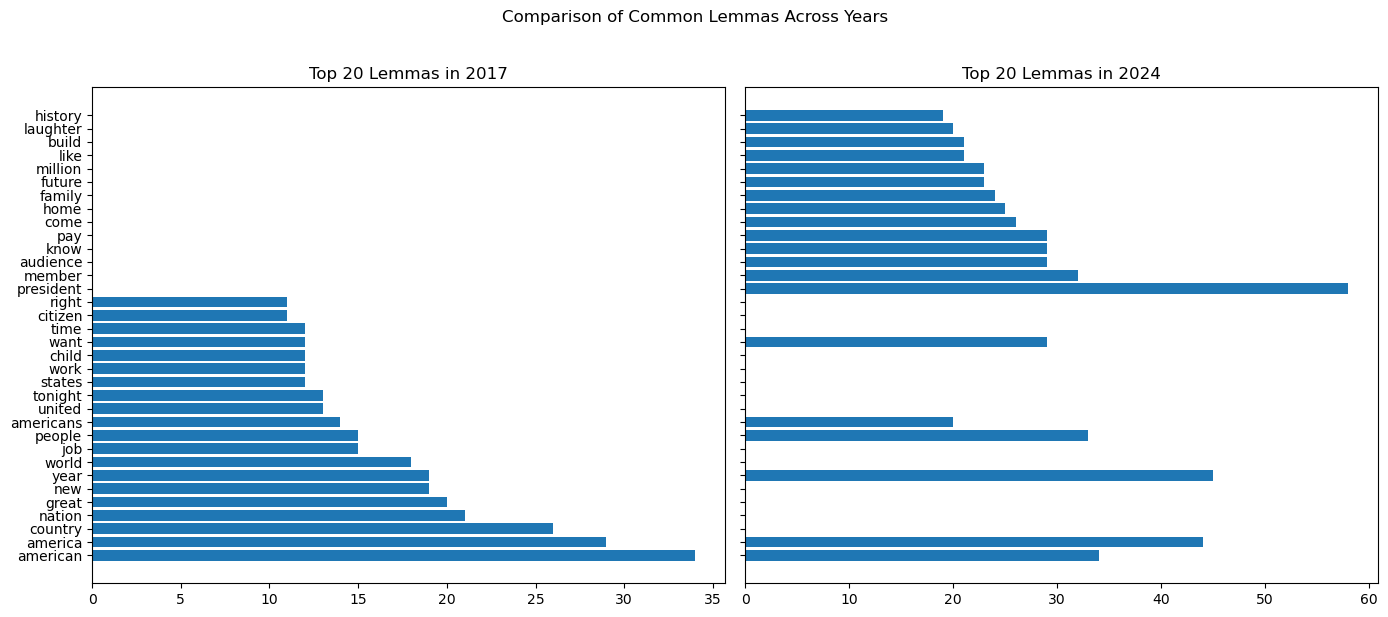

In [18]:
# Turn into DataFrames
df_a = pd.DataFrame(top_a, columns=["word",from sklearn.feature_extraction.text import TfidfVectorizer

df["lemmas_list"] = df["text"].apply(lambda x: get_filtered_lemmas(x, nlp))
df["lemmas_str"] = df["lemmas_list"].apply(lambda lemmas: " ".join(lemmas))

vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=5,
    ngram_range=(1, 1)
)

X_tfidf = vectorizer.fit_transform(df["lemmas_str"])
print("TF-IDF shape:", X_tfidf.shape)
 "count"])
df_b = pd.DataFrame(top_b, columns=["word", "count"])

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: year_a
axes[0].barh(df_a["word"], df_a["count"])
axes[0].set_title(f"Top 20 Lemmas in {year_a}")
axes[0].invert_yaxis()

# Right: year_b
axes[1].barh(df_b["word"], df_b["count"])
axes[1].set_title(f"Top 20 Lemmas in {year_b}")
axes[1].invert_yaxis()

fig.suptitle("Comparison of Common Lemmas Across Years", y=1.02)
plt.tight_layout()
plt.savefig("outputs/part2_top20_lemmas_comparison_years.png", bbox_inches="tight")
plt.show()


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

df["lemmas_list"] = df["text"].apply(lambda x: get_filtered_lemmas(x, nlp))
df["lemmas_str"] = df["lemmas_list"].apply(lambda lemmas: " ".join(lemmas))

vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=5,
    ngram_range=(1, 1)
)

X_tfidf = vectorizer.fit_transform(df["lemmas_str"])
print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (246, 7502)


In [20]:
from sklearn.decomposition import PCA

# Convert sparse TF-IDF to dense array
X_dense = X_tfidf.toarray()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

print("PCA shape:", X_pca.shape)


PCA shape: (246, 2)


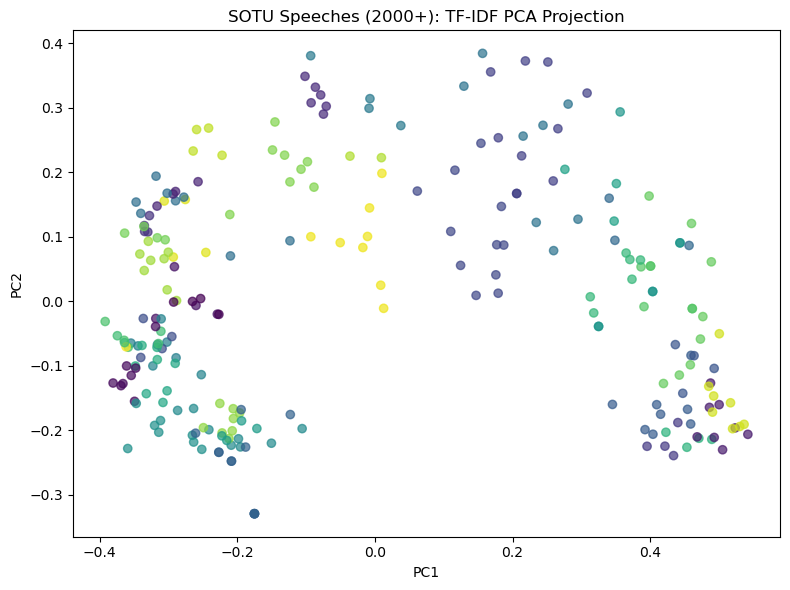

In [21]:
# Use presidents for labeling / coloring
presidents = df["president"].astype(str).values
unique_presidents = sorted(df["president"].astype(str).unique())
pres_to_num = {p: i for i, p in enumerate(unique_presidents)}
colors = [pres_to_num[p] for p in presidents]

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("SOTU Speeches (2000+): TF-IDF PCA Projection")

plt.tight_layout()
plt.savefig("outputs/part2_tfidf_pca_scatter.png", bbox_inches="tight")
plt.show()


### What is TF–IDF and why do we use it?

TF–IDF stands for **Term Frequency – Inverse Document Frequency**.  
It is a way to turn each speech into a numeric vector based on the words it uses.

- **Term Frequency (TF)**: how often a word appears in one speech.  
  Words that appear many times in that speech get a higher TF.

- **Inverse Document Frequency (IDF)**: how rare a word is across **all** speeches.  
  Words that appear in almost every speech (like “government”) get a low IDF.  
  Words that appear in only a few speeches get a high IDF.

The final **TF–IDF score** is TF × IDF.  
A word gets a **high TF–IDF score** if it is:
- frequent in this specific speech,  
- but not very common in the whole collect
